In [1]:
import pandas as pd
from io import StringIO

In [13]:
#サンプルデータを作成
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0'''
#サンプルデータを読み込む
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [14]:
#各特徴量の欠損値をカウント
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [16]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [17]:
#欠損値を含む行を削除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [18]:
#欠損値を含む列を削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [20]:
#全ての列がNaNである行だけを削除
df.dropna(how="all")
#非Nan値が４つ未満の行を削除
df.dropna(thresh=4)
#特定の列（この場合は”C"）にNanが含まれている行だけを削除
df.dropna(subset=["C"])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [24]:
from sklearn.preprocessing import Imputer

In [35]:
#欠損値補完のインスタンスを生成（平均値補完）
imr = Imputer(missing_values="NaN",strategy="mean",axis=0)

In [36]:
#データを適合
imr = imr.fit(df.values)
#補完を実行
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

４．２　カテゴリーデータの処理

In [38]:
#サンプルデータを作成(Tシャツの色、サイズ、価格、クラスラベル)
df = pd.DataFrame([
    ["green","M",10.1,"class1"],
    ["red","L",13.5,"class2"],
    ["blue","XL",15.3,"class1"]])
#列名を設定
df.columns = ["color","size","price","classlabel"]
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [39]:
#Tシャツのサイズと整数を対応させるディクショナリを作成
size_mapping = {"XL":3,"L":2,"M":1}
#Tシャツのサイズを整数に変換
df["size"]=df["size"].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [40]:
inv_size_mapping ={v:k for k,v in size_mapping.items()}
df["size"].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [41]:
import numpy as np

In [42]:
#クラスレベルと整数を対応させるディクショナリを作成
class_mapping={label:idx for idx,label in enumerate(np.unique(df["classlabel"]))}
class_mapping

{'class1': 0, 'class2': 1}

In [43]:
#クラスラベルを整数に変換
df["classlabel"]=df["classlabel"].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [44]:
#上で作ったやつの逆変換用
inv_class_mapping={idx:label for label,idx in class_mapping.items()}
df["classlabel"]=df["classlabel"].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
class_le = LabelEncoder()
y=class_le.fit_transform(df["classlabel"].values)
y

array([0, 1, 0])

In [47]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [48]:
#Tシャツの色、サイズ、価格を抽出
X = df[["color","size","price"]].values
color_le = LabelEncoder()
X[:,0]=color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

one-hot エンコーディング

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
#one-hotエンコーダの作成
ohe = OneHotEncoder(categorical_features=[0])
#one-hotエンコーディングを実行
ohe.fit_transform(X).toarray()

/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [54]:
#one-hotエンコーディングを実行
pd.get_dummies(df[["price","color","size"]])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [55]:
#最初のダミー特徴量を排除（情報は失われない）
pd.get_dummies(df[["price","color","size"]],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [56]:
#one-hotエンコーダーには列削除のパラメータは定義されていないが実装は簡単
ohe.fit_transform(X).toarray()[:,1:]

/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

４．３　データセットをトレーニングとテストに分割する

In [62]:
#wineデータセットを読み込む
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [65]:
#列名を設定
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
#クラスラベルを表示
print("Class labels",np.unique(df_wine["Class label"]))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [66]:
from sklearn.model_selection import train_test_split

In [68]:
#特徴量とクラスラベルを別々に抽出
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
#トレーニングデータとテストデータに分割(全体の３０％をテストデータに)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
#yをstratifyに渡すことでトレーニングセットとテストセットのyのクラスの比率が元のデータセットと同じようになっている

In [69]:
from sklearn.preprocessing import MinMaxScaler
#Min-Maxスケーリングのインスタンスを作成
mms = MinMaxScaler()
#トレーニングデータをスケーリング
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [72]:
ex = np.array([0,1,2,3,4,5])
print("standardized:",(ex-ex.mean())/ex.std())
print("normalized:",(ex-ex.min())/(ex.max()-ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [73]:
from sklearn.preprocessing import StandardScaler
#標準化のインスタンスを生成（平均=０、標準誤差＝１に変換）
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

４．５　有益な特徴量の選択

In [78]:
from sklearn.linear_model import LogisticRegression
#L1正則化ロジスティック回帰のインスタンスを生成
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
#L1正則化ロジスティック回帰のインスタンスを生成（逆正則化パラメータC=1.0）
lr = LogisticRegression(penalty='l1',C=1.0)
#トレーニングデータに適合
lr.fit(X_train_std,y_train)
#トレーニングデータに対する正解率の表示
print("Training accuracy:",lr.score(X_train_std,y_train))
#テストデータに対する正解率の表示
print("Test accuracy",lr.score(X_test_std,y_test))

Training accuracy: 1.0
Test accuracy 1.0


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [80]:
#切片の表示
lr.intercept_

array([-1.26353057, -1.21636936, -2.37000105])

In [81]:
#重み係数の表示
lr.coef_

array([[ 1.24566685,  0.18036438,  0.74512853, -1.16277726,  0.        ,
         0.        ,  1.164293  ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55316047,  2.50970331],
       [-1.5368161 , -0.38709254, -0.99501534,  0.36458141, -0.05956238,
         0.        ,  0.66829067,  0.        ,  0.        , -1.93482822,
         1.23345218,  0.        , -2.23212311],
       [ 0.13584905,  0.1685244 ,  0.3571248 ,  0.        ,  0.        ,
         0.        , -2.43798732,  0.        ,  0.        ,  1.56374378,
        -0.8188157 , -0.49215497,  0.        ]])

In [82]:
import matplotlib.pyplot as plt

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

<function matplotlib.pyplot.show(*args, **kw)>

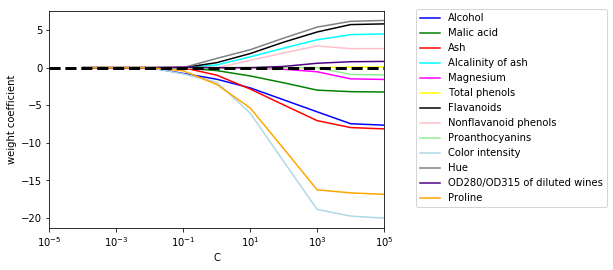

In [87]:
#描画の準備
fig = plt.figure()
ax = plt.subplot(111)
#各係数の色のリスト
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']
#からのリストを生成（重み係数、逆正則化パラメータ）
weights,params=[],[]
#逆正則化パラメータの値ごとに処理
for c in np.arange(-4.,6.):
    lr =LogisticRegression(penalty="l1",C=10.**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
#重み係数をNumpy配列に変換
weights = np.array(weights)
#各重み係数をプロット
for column,color in zip(range(weights.shape[1]),colors):
    #横軸を逆正則化パラメータ、縦軸を重み係数とした折れ線グラフ
    plt.plot(params,weights[:,column],label=df_wine.columns[column+1],color=color)
    
#y=0に黒い波線を引く
plt.axhline(0,color="black",linestyle ="--",linewidth=3)
#横軸の範囲の設定
plt.xlim([10**(-5),10**5])
#軸のラベルの設定
plt.ylabel("weight coefficient")
plt.xlabel("C")
#横軸を対数スケールに設定
plt.xscale("log")
plt.legend(loc="upper left")
ax.legend(loc="upper center",bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show

In [88]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

In [89]:
class SBS():
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.25,random_state=1):
        self.scoring = scoring                  #特徴量を評価する指標
        self.estimator=estimator                #推定器
        self.k_features = k_features            #選択する特徴量の個数
        self.test_size = test_size              #テストデータの割合
        self.random_state=random_state
        
    def fit(self,X,y):
        #トレーニングデータとテストデータに分割
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=self.test_size,random_state=self.random_state)
        #全ての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        #すべての特徴量を用いてスコアを算出
        score = self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        #スコアを格納
        self.scores_ =[score]
        #指定した特徴量の個数になるまで処理を反復
        while dim >self.k_features:
            #空のリストの生成（スコア、列インデックス）
            scores=[]
            subsets=[]
            
            #特徴量の部分集合を表す列インデックスの組み合わせごとに処理を反復
            for p in combinations(self.indices_,r=dim-1):
                #スコアを算出して格納
                score = self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                #特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
                
            #最良のスコアのインデックスを抽出
            best = np.argmax(scores)
            #最良のスコアとなる列インデックスを抽出して格納
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
            #特徴量の個数を１つだけ減らして次のステップへ
            dim -=1
            
            #スコアを格納
            self.scores_.append(scores[best])
            
        #最後に格納したスコア
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self,X):
        #抽出した特徴量を返す
        return X[:,self.indices_]
    
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        #指定された列番号indicesの特徴量を抽出してモデルを適合
        self.estimator.fit(X_train[:,indices],y_train)
        #テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:,indices])
        #真のクラスラベルを予測値を用いてスコアを算出
        score = self.scoring(y_test,y_pred)
        return score

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
#k近傍法分類器のインスタンスを作成（近傍点数＝５）
knn = KNeighborsClassifier(n_neighbors=5)
#逐次後退選択のインスタンスを作成（特徴量の個数が１になるまで特徴量を選択）
sbs = SBS(knn,k_features=1)
#逐次後退選択を実行
sbs.fit(X_train_std,y_train)

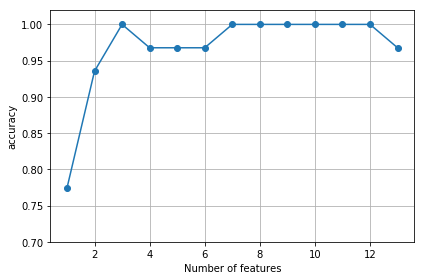

In [92]:
#特徴量の個数のリスト（13,12,...,1）
k_feat = [len(k) for k in sbs.subsets_]
#横軸を特徴量の個数、縦軸をスコアとした折れ線グラフのプロット
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel("accuracy")
plt.xlabel("Number of features")
plt.grid()
plt.tight_layout()
plt.show()

In [99]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [100]:
#元のテストデータでKNN分類器の性能を評価
#13個全ての特徴量を用いてモデルを結合
knn.fit(X_train_std,y_train)
#トレーニングの正解率を出力
print("Training accuracy:",knn.score(X_train_std,y_train))

#テストの正解率を出力
print("Test accuracy :",knn.score(X_test_std,y_test))

Training accuracy: 0.967741935483871
Test accuracy : 0.9629629629629629


In [102]:
###### 3つの特徴量を用いてモデルを結合
knn.fit(X_train_std[:,k3],y_train)
#トレーニングの正解率を出力
print("Training accuracy:",knn.score(X_train_std[:,k3],y_train))
#テストの正解率を出力
print("Test accuracy :",knn.score(X_test_std[:,k3],y_test))

Training accuracy: 0.9516129032258065
Test accuracy : 0.9259259259259259


In [103]:
from sklearn.ensemble import RandomForestClassifier

 1)Proline                       0.185453
 2)Flavanoids                    0.174751
 3)Color intensity               0.143920
 4)OD280/OD315 of diluted wines  0.136162
 5)Alcohol                       0.118529
 6)Hue                           0.058739
 7)Total phenols                 0.050872
 8)Magnesium                     0.031357
 9)Malic acid                    0.025648
10)Proanthocyanins               0.025570
11)Alcalinity of ash             0.022366
12)Nonflavanoid phenols          0.013354
13)Ash                           0.013279


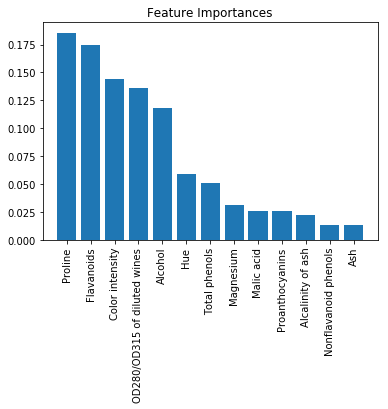

In [106]:
#Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[1:]
#ランダムフォレストオブジェクトの生成（決定木の個数＝５００）
forest = RandomForestClassifier(n_estimators=500,random_state=1)
#モデルを適合
forest.fit(X_train,y_train)
#特徴量の重要度を抽出
importances = forest.feature_importances_
#特徴量の降順で特徴量のインデックスの抽出
indices = np.argsort(importances)[::-1]
#重要度の降順で特徴量の名称、重要度を表示
for f in range(X_train.shape[1]):
    print("%2d)%-*s%f"%(f+1,30,feat_labels[indices[f]],importances[indices[f]]))

plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]),importances[indices],align="center")
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout
plt.show()

In [107]:
from sklearn.feature_selection import SelectFromModel

In [109]:
#特徴選択オブジェクトを生成(重要度の閾値を0.1に設定)
sfm = SelectFromModel(forest,threshold=0.1,prefit=True)
#特徴量を抽出
X_selected = sfm.transform(X_train)
print("Number of samples that that meet this criterion:",X_selected.shape[0])

for f in range(X_selected.shape[1]):
    print("%2d)%-*s%f"%(f+1,30,feat_labels[indices[f]],importances[indices[f]]))

Number of samples that that meet this criterion: 124
 1)Proline                       0.185453
 2)Flavanoids                    0.174751
 3)Color intensity               0.143920
 4)OD280/OD315 of diluted wines  0.136162
 5)Alcohol                       0.118529
